In [127]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('float_format', '{:.3f}'.format)
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from statsmodels.genmod.generalized_linear_model import GLM
from pandas.plotting import scatter_matrix
from scipy.stats import zscore, iqr, median_abs_deviation
from sklearn.model_selection import train_test_split,  KFold, cross_validate, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats.mstats import winsorize


from sklearn.metrics import confusion_matrix,classification_report, accuracy_score,  precision_score, recall_score, f1_score

# Import the data

In [128]:
#import data from
df_nasa = pd.read_csv('exoplanets.csv', sep=',', header=0)
# Print the shape of the dataset
print(df_nasa.shape)
# Print the first 100 rows of the dataset
df_nasa.head(100)

(9564, 49)


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.000,4.544,0.044,-0.176,0.868,0.233,-0.078,297.005,48.134,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.000,4.564,0.053,-0.168,0.791,0.201,-0.067,285.535,48.285,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.000,4.438,0.070,-0.210,1.046,0.334,-0.133,288.755,48.226,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3734868,K00805.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.053,0,1,0,0,...,-169.000,4.359,0.180,-0.180,1.024,0.280,-0.186,287.697,38.886,15.646
96,3832474,K00806.01,Kepler-30 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-120.000,4.556,0.014,-0.081,0.867,0.079,-0.037,285.284,38.947,15.403
97,8395660,K00116.03,Kepler-106 b,CONFIRMED,CANDIDATE,0.950,0,0,0,0,...,-117.000,4.406,0.090,-0.110,1.012,0.154,-0.103,300.864,44.338,12.882
98,3832474,K00806.02,Kepler-30 c,CONFIRMED,CANDIDATE,0.745,0,0,0,0,...,-120.000,4.556,0.014,-0.081,0.867,0.079,-0.037,285.284,38.947,15.403


In [129]:
#Rename columns (more meaningful names)
df_nasa = df_nasa.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod_days',
'koi_period_err1':'OrbitalPeriodUpperUnc_days',
'koi_period_err2':'OrbitalPeriodLowerUnc_days',
'koi_time0bk':'TransitEpoch_BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc_BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc_BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration_hrs',
'koi_duration_err1':'TransitDurationUpperUnc_hrs',
'koi_duration_err2':'TransitDurationLowerUnc_hrs',
'koi_depth':'TransitDepth_ppm',
'koi_depth_err1':'TransitDepthUpperUnc_ppm',
'koi_depth_err2':'TransitDepthLowerUnc_ppm',
'koi_prad':'PlanetaryRadius_Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc_Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc_Earthradii',
'koi_teq':'EquilibriumTemperatureK',
'koi_teq_err1':'EquilibriumTemperatureUpperUncK',
'koi_teq_err2':'EquilibriumTemperatureLowerUncK',
'koi_insol':'InsolationFlux_Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc_Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc_Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumber',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperatureK',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUncK',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUncK',
'koi_slogg':'StellarSurfaceGravity_log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc_log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc_log10(cm/s**2)',
'koi_srad':'StellarRadius_Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc_Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc_Solarradii',
'ra':'RA_decimaldegrees',
'dec':'Dec_decimaldegrees',
'koi_kepmag':'Kepler-band_mag'
})
df_nasa.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,...,StellarEffectiveTemperatureLowerUncK,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.000,4.544,0.044,-0.176,0.868,0.233,-0.078,297.005,48.134,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.000,4.564,0.053,-0.168,0.791,0.201,-0.067,285.535,48.285,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.000,4.438,0.070,-0.210,1.046,0.334,-0.133,288.755,48.226,15.509


# Explore the data 

In [130]:
# Print the data types of the dataset
df_nasa.dtypes

KepID                                                      int64
KOIName                                                   object
KeplerName                                                object
ExoplanetArchiveDisposition                               object
DispositionUsingKeplerData                                object
DispositionScore                                         float64
NotTransit-LikeFalsePositiveFlag                           int64
koi_fpflag_ss                                              int64
CentroidOffsetFalsePositiveFlag                            int64
EphemerisMatchIndicatesContaminationFalsePositiveFlag      int64
OrbitalPeriod_days                                       float64
OrbitalPeriodUpperUnc_days                               float64
OrbitalPeriodLowerUnc_days                               float64
TransitEpoch_BKJD                                        float64
TransitEpochUpperUnc_BKJD                                float64
TransitEpochLowerUnc_BKJD

In [131]:
# Analysing type of data
df_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2359 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000278809BEB08>,
       dtype=object),)

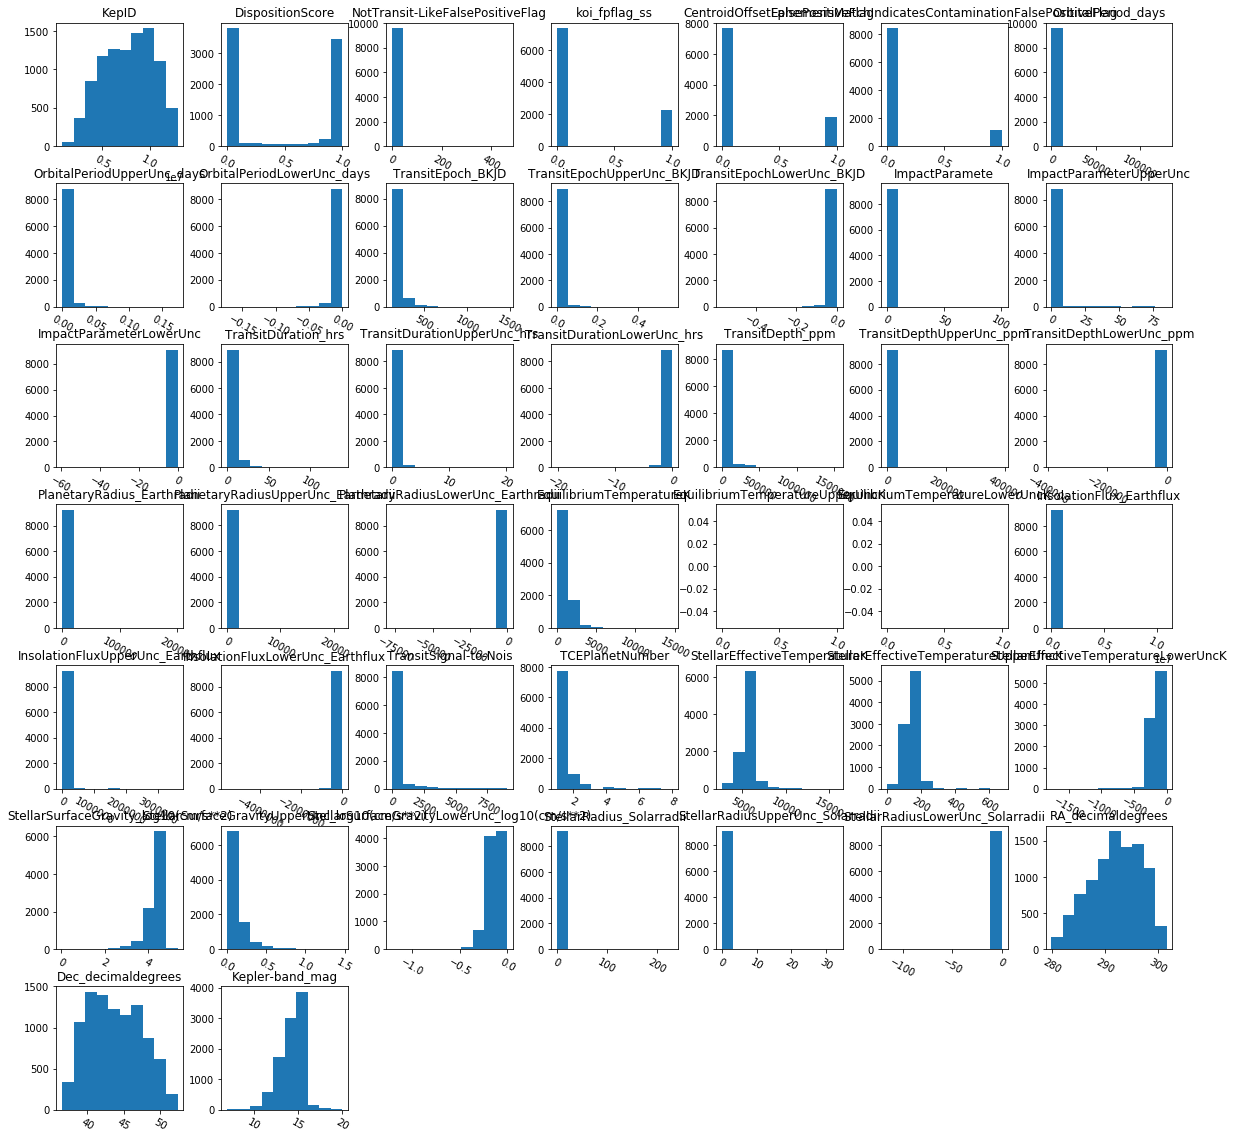

In [132]:
%matplotlib inline
# Plot histogram grid to check how data is distributed
df_nasa.hist(figsize=(20,20), xrot=-30, grid=False), 
plt.show()

In [133]:
#Decribe the the columns to get a better understanding of the data
df_nasa.describe()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod_days,OrbitalPeriodUpperUnc_days,OrbitalPeriodLowerUnc_days,TransitEpoch_BKJD,...,StellarEffectiveTemperatureLowerUncK,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag
count,9564.000,8054.000,9564.000,9564.000,9564.000,9564.000,9564.000,9110.000,9110.000,9564.000,...,9081.000,9201.000,9096.000,9096.000,9201.000,9096.000,9096.000,9564.000,9564.000,9563.000
mean,7690628.327,0.481,0.209,0.233,0.198,0.120,75.671,0.002,-0.002,166.183,...,-162.265,4.310,0.121,-0.143,1.729,0.362,-0.395,292.060,43.810,14.265
std,2653459.081,0.477,4.767,0.423,0.398,0.325,1334.744,0.008,0.008,67.919,...,72.746,0.433,0.133,0.085,6.127,0.931,2.168,4.767,3.601,1.385
min,757450.000,0.000,0.000,0.000,0.000,0.000,0.242,0.000,-0.173,120.516,...,-1762.000,0.047,0.000,-1.207,0.109,0.000,-116.137,279.853,36.577,6.966
25%,5556034.250,0.000,0.000,0.000,0.000,0.000,2.734,0.000,-0.000,132.762,...,-198.000,4.218,0.042,-0.196,0.829,0.129,-0.250,288.661,40.777,13.440
50%,7906892.000,0.334,0.000,0.000,0.000,0.000,9.753,0.000,-0.000,137.225,...,-160.000,4.438,0.070,-0.128,1.000,0.251,-0.111,292.261,43.678,14.520
75%,9873066.500,0.998,0.000,0.000,0.000,0.000,40.715,0.000,-0.000,170.695,...,-114.000,4.543,0.149,-0.088,1.345,0.364,-0.069,295.859,46.715,15.322
max,12935144.000,1.000,465.000,1.000,1.000,1.000,129995.778,0.173,0.000,1472.522,...,0.000,5.364,1.472,0.000,229.908,33.091,0.000,301.721,52.336,20.003


We have to choices for the target variable ExoplanetArchiveDisposition and DispositionUsingKeplerData check dirstribution of the two of them

In [134]:
# Print the unique classes and their counts/frequencies
df_nasa['ExoplanetArchiveDisposition'].value_counts()

FALSE POSITIVE    4840
CANDIDATE         2367
CONFIRMED         2357
Name: ExoplanetArchiveDisposition, dtype: int64

In [135]:
# Print the unique classes and their counts/frequencies
df_nasa['DispositionUsingKeplerData'].value_counts()

FALSE POSITIVE    4847
CANDIDATE         4717
Name: DispositionUsingKeplerData, dtype: int64

As the ExoplanetArchiveDisposition is using some archive knowledge we dont have access to and our goal is to predict based on  the kepler data we will choose DispositionUsingKeplerData as our target variable

We will have binary classification problem <br>
data is evenly distrobuted between candidate and False positive so no resampling necessary

We will make candidate class 1 and not candidate class 0

In [136]:
#make the target variable binary 
#make target variable numeric
df_nasa['ExoplanetCandidate'] = df_nasa['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)

# Data Cleaning

the following columns are useless for predictions and can be dropped 
(DispositionUsingKeplerData can be dropped as it was tranformed to binary in the column Exoplanet candidate) 

In [137]:
#drop for prediction useless columns (names, etc) useless columns
df_nasa.drop(columns=['KepID','KOIName','KeplerName', \
                    'ExoplanetArchiveDisposition','TCEDeliver',\
                    'TCEPlanetNumber','DispositionUsingKeplerData'], inplace=True)

# Missing values

In [138]:
#Number of Null values in the columns
df_nasa.isnull().sum()

DispositionScore                                         1510
NotTransit-LikeFalsePositiveFlag                            0
koi_fpflag_ss                                               0
CentroidOffsetFalsePositiveFlag                             0
EphemerisMatchIndicatesContaminationFalsePositiveFlag       0
OrbitalPeriod_days                                          0
OrbitalPeriodUpperUnc_days                                454
OrbitalPeriodLowerUnc_days                                454
TransitEpoch_BKJD                                           0
TransitEpochUpperUnc_BKJD                                 454
TransitEpochLowerUnc_BKJD                                 454
ImpactParamete                                            363
ImpactParameterUpperUnc                                   454
ImpactParameterLowerUnc                                   454
TransitDuration_hrs                                         0
TransitDurationUpperUnc_hrs                               454
TransitD

In [139]:
# Columns EquilibriumTemperatureUpperUncK and EquilibriumTemperatureLowerUncK are always 0 so just drop them
df_nasa.drop(columns=['EquilibriumTemperatureUpperUncK','EquilibriumTemperatureLowerUncK'], inplace=True)

<BarContainer object of 7 artists>

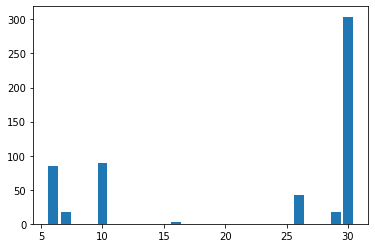

(9564, 41)


In [140]:
# For the other null values check for correlations in terms that there might be rows with multiple null values

null_counts = df_nasa.isnull().sum(axis=1)
null_values_row = null_counts.value_counts()
# only the ones with multiple null values 
null_values_row = null_values_row[(null_values_row.index != 0) & (null_values_row.index != 1)]
plt.bar(null_values_row.index, null_values_row.values)
plt.show()
print(df_nasa.shape)

we can see that we have rows with up to 30 null values as we are right know only considering 41 columns we will drop all rows with 10 or more null values as around 25% of those rows need would need to be imputed so the gain in information with those rows is limited


In [141]:
# Filter the rows where the null count is less than or equal to 5
rows_to_keep = null_counts[null_counts < 10].index

# Drop the rows where the null count is greater than 5
df_nasa = df_nasa.loc[rows_to_keep]
print(df_nasa.shape)
df_nasa.head()

(9110, 41)


,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod_days,OrbitalPeriodUpperUnc_days,OrbitalPeriodLowerUnc_days,TransitEpoch_BKJD,TransitEpochUpperUnc_BKJD,...,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag,ExoplanetCandidate
0,1.000,0,0,0,0,9.488,0.000,-0.000,170.539,0.002,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347,1
1,0.969,0,0,0,0,54.418,0.000,-0.000,162.514,0.004,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347,1
2,0.000,0,0,0,0,19.899,0.000,-0.000,175.850,0.001,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.005,48.134,15.436,1
3,0.000,0,1,0,0,1.737,0.000,-0.000,170.308,0.000,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.535,48.285,15.597,0
4,1.000,0,0,0,0,2.526,0.000,-0.000,171.596,0.001,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.755,48.226,15.509,1


We only lose 454 out of 9564 rows so less than 5% of our data

In [142]:
df_nasa.isnull().sum()

DispositionScore                                         1206
NotTransit-LikeFalsePositiveFlag                            0
koi_fpflag_ss                                               0
CentroidOffsetFalsePositiveFlag                             0
EphemerisMatchIndicatesContaminationFalsePositiveFlag       0
OrbitalPeriod_days                                          0
OrbitalPeriodUpperUnc_days                                  0
OrbitalPeriodLowerUnc_days                                  0
TransitEpoch_BKJD                                           0
TransitEpochUpperUnc_BKJD                                   0
TransitEpochLowerUnc_BKJD                                   0
ImpactParamete                                              0
ImpactParameterUpperUnc                                     0
ImpactParameterLowerUnc                                     0
TransitDuration_hrs                                         0
TransitDurationUpperUnc_hrs                                 0
TransitD

Still some missing values but looking better

# Correlation

<Figure size 1440x1080 with 0 Axes>

Text(0.5, 1, 'Correlation Heatmap')

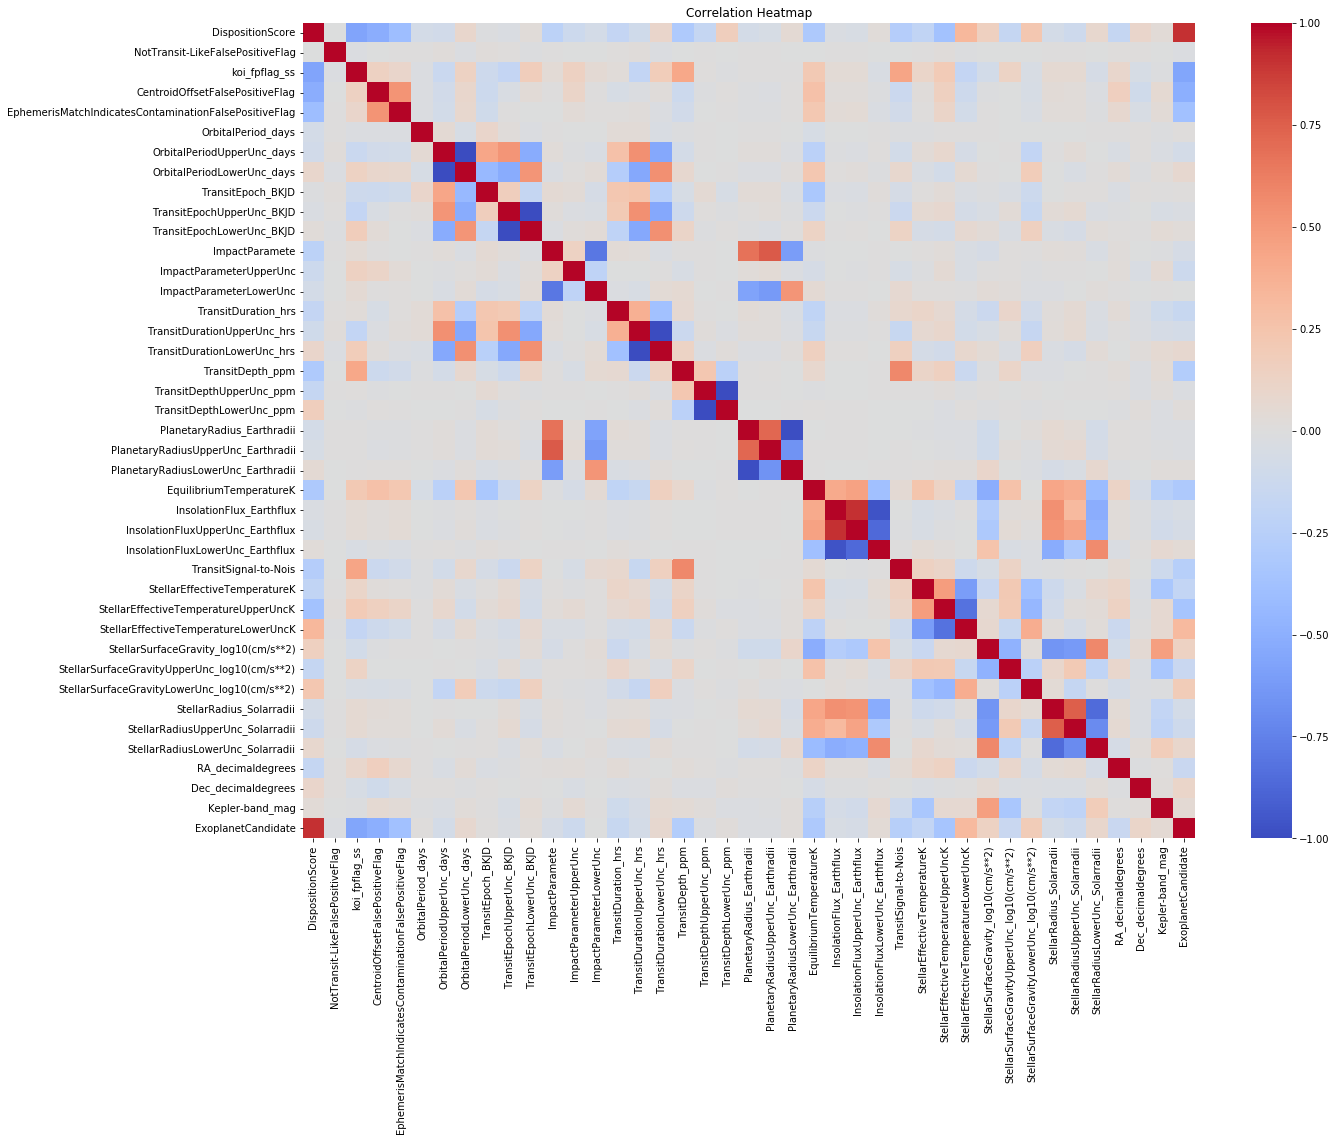

In [143]:
# Compute correlation matrix, include only float and int columns
#%matplotlib qt
%matplotlib inline
corr_matrix = df_nasa.select_dtypes(include=['float', 'int64']).corr()
plt.figure(figsize=(20, 15))
# Plot correlation heatmap
sn.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


disposition score has very strong correlation to our target variable (makes sense as it is not an observation but a computed value) so drop the disposition score

In [144]:
#drp disposition score
df_nasa.drop(columns=['DispositionScore'], inplace=True)

other observation the uncertainties always quite strong negatively correlated to each other because of that we wil add both of the value to always have just one uncertainty value (feuture engineering)

to be able to sum the values we first have to impute the missing values as some of the uncertainty columns have null values for the imputation we first have to perform the train and test split so lets start with that

In [145]:
#drop flags (still not hundered percent sure about this one)
df_nasa.drop(columns=['NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag','EphemerisMatchIndicatesContaminationFalsePositiveFlag'], inplace=True)

# Split data in train and test

In [146]:
X = df_nasa.loc[:,df_nasa.columns != 'ExoplanetCandidate']
y = df_nasa['ExoplanetCandidate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Impute the missing values (seperatly for train and test)

In [147]:
def impute_missing_values(df):

    columns_with_missing_values = ['StellarEffectiveTemperatureLowerUncK','StellarEffectiveTemperatureUpperUncK', \
                                  'StellarSurfaceGravityUpperUnc_log10(cm/s**2)','StellarSurfaceGravityLowerUnc_log10(cm/s**2)',\
                                   'StellarSurfaceGravityLowerUnc_log10(cm/s**2)','StellarRadiusLowerUnc_Solarradii',\
                                    'StellarRadiusUpperUnc_Solarradii','Kepler-band_mag']
    imputer = KNNImputer(n_neighbors=3)
    df[columns_with_missing_values] = imputer.fit_transform(df[columns_with_missing_values])

    return df

In [148]:
#impute missing values in the sets
X_train = impute_missing_values(X_train)
X_test = impute_missing_values(X_test)

In [149]:
#check if all missing values were imputed
X_train.isnull().sum()

OrbitalPeriod_days                              0
OrbitalPeriodUpperUnc_days                      0
OrbitalPeriodLowerUnc_days                      0
TransitEpoch_BKJD                               0
TransitEpochUpperUnc_BKJD                       0
TransitEpochLowerUnc_BKJD                       0
ImpactParamete                                  0
ImpactParameterUpperUnc                         0
ImpactParameterLowerUnc                         0
TransitDuration_hrs                             0
TransitDurationUpperUnc_hrs                     0
TransitDurationLowerUnc_hrs                     0
TransitDepth_ppm                                0
TransitDepthUpperUnc_ppm                        0
TransitDepthLowerUnc_ppm                        0
PlanetaryRadius_Earthradii                      0
PlanetaryRadiusUpperUnc_Earthradii              0
PlanetaryRadiusLowerUnc_Earthradii              0
EquilibriumTemperatureK                         0
InsolationFlux_Earthflux                        0


In [150]:
X_test.isnull().sum()

OrbitalPeriod_days                              0
OrbitalPeriodUpperUnc_days                      0
OrbitalPeriodLowerUnc_days                      0
TransitEpoch_BKJD                               0
TransitEpochUpperUnc_BKJD                       0
TransitEpochLowerUnc_BKJD                       0
ImpactParamete                                  0
ImpactParameterUpperUnc                         0
ImpactParameterLowerUnc                         0
TransitDuration_hrs                             0
TransitDurationUpperUnc_hrs                     0
TransitDurationLowerUnc_hrs                     0
TransitDepth_ppm                                0
TransitDepthUpperUnc_ppm                        0
TransitDepthLowerUnc_ppm                        0
PlanetaryRadius_Earthradii                      0
PlanetaryRadiusUpperUnc_Earthradii              0
PlanetaryRadiusLowerUnc_Earthradii              0
EquilibriumTemperatureK                         0
InsolationFlux_Earthflux                        0


# Outliers 

Here will probably the outlier handling happen

In [151]:
# Set the thresholds for Winsorization
column_names_list = X_train.columns.tolist()
lower_threshold = 0.05
upper_threshold = 0.05


# Apply Winsorization to each column
winsorized_df = X_train.apply(lambda x: winsorize(x, limits=(lower_threshold, upper_threshold)))

# Update the original DataFrame with the Winsorized values
X_train.update(winsorized_df)

X_train.head()


,OrbitalPeriod_days,OrbitalPeriodUpperUnc_days,OrbitalPeriodLowerUnc_days,TransitEpoch_BKJD,TransitEpochUpperUnc_BKJD,TransitEpochLowerUnc_BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration_hrs,...,StellarEffectiveTemperatureLowerUncK,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag
5370,0.705,0.000,-0.000,132.022,0.000,-0.000,0.506,0.021,-0.018,1.931,...,-157.000,4.612,0.052,-0.028,0.663,0.048,-0.058,294.360,46.125,15.911
3126,15.907,0.000,-0.000,177.930,0.001,-0.001,0.018,0.417,-0.014,3.988,...,-101.000,4.554,0.036,-0.050,0.797,0.052,-0.042,290.297,38.393,14.172
4861,302.780,0.010,-0.010,327.411,0.027,-0.027,0.018,0.440,-0.005,16.102,...,-154.000,4.572,0.042,-0.168,0.797,0.207,-0.069,295.984,40.044,14.160
5346,7.441,0.000,-0.000,137.343,0.018,-0.018,1.251,6.684,-0.518,2.875,...,-252.000,4.321,0.105,-0.195,1.183,0.340,-0.183,287.372,46.565,14.114
8179,129.847,0.005,-0.005,240.681,0.024,-0.024,0.018,0.430,-0.005,13.057,...,-257.000,4.427,0.072,-0.217,1.032,0.334,-0.119,293.677,40.334,14.520


# Feature Engineering

now we can combine the uncertainty columns with the high negative correlations

In [152]:
def combine_uncertainties(df):
    
    df['OrbitalPeriodUnc'] = abs(df['OrbitalPeriodUpperUnc_days']) + abs(df['OrbitalPeriodLowerUnc_days'])
    df['TransitEpochUnc'] = abs(df['TransitEpochUpperUnc_BKJD']) + abs(df['TransitEpochLowerUnc_BKJD'])
    df['ImpactParameterUnc'] = abs(df['ImpactParameterUpperUnc']) + abs(df['ImpactParameterLowerUnc'])
    df['TransitDurationUnc_hrs'] = abs(df['TransitDurationUpperUnc_hrs']) + abs(df['TransitDurationLowerUnc_hrs'])
    df['TransitDepthUnc_ppm'] = abs(df['TransitDepthUpperUnc_ppm']) + abs(df['TransitDepthLowerUnc_ppm'])
    df['PlanetaryRadiusUnc_Earthradii'] = abs(df['PlanetaryRadiusUpperUnc_Earthradii']) + abs(df['PlanetaryRadiusLowerUnc_Earthradii'])
    df['InsolationFluxUnc_Earthflux'] = abs(df['InsolationFluxUpperUnc_Earthflux']) + abs(df['InsolationFluxLowerUnc_Earthflux'])
    df['StellarEffectiveTemperatureUncK'] = abs(df['StellarEffectiveTemperatureUpperUncK']) + abs(df['StellarEffectiveTemperatureLowerUncK'])
    df['StellarSurfaceGravityUnc_log10(cm/s**2)'] = abs(df['StellarSurfaceGravityUpperUnc_log10(cm/s**2)']) + abs(df['StellarSurfaceGravityLowerUnc_log10(cm/s**2)'])
    df['StellarRadiusUnc_Solarradii'] = abs(df['StellarRadiusUpperUnc_Solarradii']) + abs(df['StellarRadiusLowerUnc_Solarradii'])
    
    
    df.drop(columns=['OrbitalPeriodUpperUnc_days','OrbitalPeriodLowerUnc_days','TransitEpochUpperUnc_BKJD',\
                     'TransitEpochLowerUnc_BKJD','ImpactParameterUpperUnc','ImpactParameterLowerUnc',\
                     'TransitDurationUpperUnc_hrs','TransitDurationLowerUnc_hrs','TransitDepthUpperUnc_ppm',\
                     'TransitDepthLowerUnc_ppm','PlanetaryRadiusUpperUnc_Earthradii','PlanetaryRadiusLowerUnc_Earthradii',\
                     'InsolationFluxUpperUnc_Earthflux',\
                     'InsolationFluxLowerUnc_Earthflux','StellarEffectiveTemperatureUpperUncK',\
                     'StellarEffectiveTemperatureLowerUncK','StellarSurfaceGravityUpperUnc_log10(cm/s**2)',\
                     'StellarSurfaceGravityLowerUnc_log10(cm/s**2)','StellarRadiusUpperUnc_Solarradii',\
                     'StellarRadiusLowerUnc_Solarradii'], inplace=True)
    
    return df

In [153]:
X_train = combine_uncertainties(X_train)
X_test = combine_uncertainties(X_test)
X_test.head()

,OrbitalPeriod_days,TransitEpoch_BKJD,ImpactParamete,TransitDuration_hrs,TransitDepth_ppm,PlanetaryRadius_Earthradii,EquilibriumTemperatureK,InsolationFlux_Earthflux,TransitSignal-to-Nois,StellarEffectiveTemperatureK,...,OrbitalPeriodUnc,TransitEpochUnc,ImpactParameterUnc,TransitDurationUnc_hrs,TransitDepthUnc_ppm,PlanetaryRadiusUnc_Earthradii,InsolationFluxUnc_Earthflux,StellarEffectiveTemperatureUncK,StellarSurfaceGravityUnc_log10(cm/s**2),StellarRadiusUnc_Solarradii
2892,7.329,132.129,0.983,1.211,278.000,2.330,807.000,100.130,14.000,5135.000,...,0.000,0.005,0.850,0.228,55.200,0.310,38.880,160.000,0.123,0.117
3035,4.993,169.553,1.232,3.101,557.000,26.600,1051.000,288.290,42.300,5724.000,...,0.000,0.004,23.153,0.176,31.400,10.880,323.030,304.000,0.289,0.389
3251,0.535,131.736,0.017,3.340,229.000,1.090,1783.000,2385.750,48.800,5044.000,...,0.000,0.005,0.422,0.141,12.200,0.220,1528.580,287.000,0.126,0.151
8022,0.710,131.977,0.145,1.318,223.000,1.490,2036.000,4086.460,9.400,5618.000,...,0.000,0.011,0.468,0.410,62.000,0.670,4962.910,338.000,0.340,0.448
4023,10.777,140.290,0.069,2.616,186.000,1.150,752.000,75.830,11.300,5455.000,...,0.000,0.020,0.450,0.470,39.000,0.420,78.830,324.000,0.294,0.317


# Scaling

as there is no clear gaussanity use the Min/Max Scaler

In [154]:
#as Min/Max scaler is not working right now because of outliers use for now standard scaler
def scaling(X, y, scaler=None):    
    # scale only based on the training data set
    if scaler is None: 
        # We only want the scaler to fit the train data
        scaler = MinMaxScaler()
        #scaler = StandardScaler()
        X= scaler.fit_transform(X)
    else: 
        X = scaler.transform(X) 

    return X, y, scaler

In [155]:
X_train, y_train, scaler = scaling(X_train,y_train)
X_test, y_test, _ = scaling(X_test,y_test,scaler)

In [156]:
#function for result dataframe 

result_df = pd.DataFrame(columns=['Model','Details','Accuracy', 'F1 Macro', 'Precision Macro', 'Recall Macro'])


def append_results(model_name,details ,cross_val_results, result_df):
    # Calculate and store the average results
    average_results = {
        'Model': model_name,
        'Details': details,
        'Accuracy': cross_val_results['test_accuracy'].mean(),
        'F1 Macro': cross_val_results['test_f1_macro'].mean(),
        'Precision Macro': cross_val_results['test_precision_macro'].mean(),
        'Recall Macro': cross_val_results['test_recall_macro'].mean()
    }
    
    # Append the average results to the result dataframe
    result_df = result_df.append(average_results, ignore_index=True)
    
    return result_df

# Logistic Regression

as we still havee 25 features use regularized logistic regression to peneliaze complexity

In [157]:
#regularized log regression
logreg = LogisticRegressionCV(Cs=10, random_state=1, cv = 5, scoring = 'accuracy',max_iter=5000)
logreg.fit(X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=5000, random_state=1, scoring='accuracy')

In [158]:
# print optimal 'C'
avg_crossval_scores = logreg.scores_[1].mean(axis=0)
idx = np.argmax(avg_crossval_scores)
best_C = logreg.Cs_[idx]
print(best_C)

21.54434690031882


In [159]:
#print regression coefficients
logreg.coef_

array([[-2.09145305, -0.1744613 , -0.96781113, -0.72096287, -9.39261285,
        -6.06647004, -5.87842029, -1.01877919, -0.80194291,  2.1679141 ,
        -3.45556392, -0.24651949, -0.70512551,  0.79616408,  1.41034958,
         0.75683502, -0.20079409, -0.81050781, -2.5470872 , -0.16269737,
         3.57268358,  1.30299727, -2.76138184, -0.87388793, -1.26818403]])

In [160]:
#calculate regression results for best C
logreg = LogisticRegression(C=best_C,max_iter=5000)
cross_val_results = pd.DataFrame(cross_validate(logreg, X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))

cross_val_results

,fit_time,score_time,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro
0,0.272,0.007,0.837,0.837,0.840,0.837
1,0.226,0.007,0.830,0.830,0.831,0.830
2,0.208,0.008,0.830,0.830,0.830,0.830
3,0.232,0.007,0.829,0.828,0.831,0.828
4,0.262,0.009,0.833,0.833,0.834,0.833


quite a high value for C and some regression coefficients that are close to zero so looks like regression is more complex than needed try to reduce features <br> 
in addition needed to increase value of max iterations to 5000 to be able to reach convergence <br> 
classification metrics are okay with around 80% 

In [161]:
#put to results

In [162]:
result_df = append_results('Logistic Regression','Performed feature selection', cross_val_results, result_df)

# Feature Selection

perform backward feature selection so iteratively reduce number of features by removing the one with the least gain

In [58]:
logreg = LogisticRegressionCV(Cs=10, random_state=1, cv = 5, scoring = 'accuracy',max_iter=5000)

# Sequential Backward Selection
sbs = SFS(logreg, 
          forward=False, 
          floating=False,
          k_features=1,
          scoring='accuracy')
# Perform feature selection
sbs = sbs.fit(X_train, y_train)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [59]:
df_log_reg_result = pd.DataFrame(sbs.get_metric_dict())
display(df_log_reg_result)

,25,24,23,22,21
feature_idx,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...","(2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, ..."
cv_scores,"[0.8067158067158067, 0.8058968058968059, 0.810...","[0.8108108108108109, 0.8091728091728092, 0.809...","[0.8116298116298116, 0.8083538083538083, 0.812...","[0.8116298116298116, 0.8091728091728092, 0.814...","[0.8124488124488124, 0.8075348075348076, 0.820..."
avg_score,0.811,0.812,0.812,0.813,0.813
feature_names,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...","(2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, ..."
ci_bound,0.005,0.003,0.004,0.004,0.007
std_dev,0.004,0.003,0.003,0.003,0.006
std_err,0.002,0.001,0.001,0.001,0.003


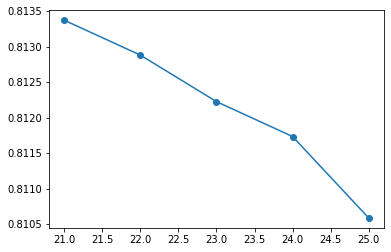

In [60]:
avg_score = df_log_reg_result.loc['avg_score']
avg_score.plot(kind='line', marker='o')

In [61]:
#print all the avergae accuracy
for column in df_log_reg_result.columns:
    avg_score = df_log_reg_result.loc['avg_score', column]
    # Access each column using the column label
    print(f"Number of Feutures '{column}': -> Accuracy {avg_score}" )

Number of Feutures '25': -> Accuracy 0.8105863240289469
Number of Feutures '24': -> Accuracy 0.8117327909131188
Number of Feutures '23': -> Accuracy 0.8122241914045194
Number of Feutures '22': -> Accuracy 0.81287939205972
Number of Feutures '21': -> Accuracy 0.8133703897638324


We can see convergence around 10 features so with only 10 features we are able to achieve a similar accuracy as with 25 features but we will have a simpler model

Select the top 10 features and perform the logistic regression again only with them

In [48]:
def select_features(numpy_array,column_labels,feature_list):
    #covert numpy array to pandas dataframe to be able to select features by index
    df = pd.DataFrame(numpy_array, columns=column_labels)
    df = df.iloc[:, feature_list]
    return df

In [49]:
column_labels = ['OrbitalPeriod_days',
 'TransitEpoch_BKJD',
 'ImpactParamete',
 'TransitDuration_hrs',
 'TransitDepth_ppm',
 'PlanetaryRadius_Earthradii',
 'EquilibriumTemperatureK',
 'InsolationFlux_Earthflux',
 'TransitSignal-to-Nois',
 'StellarEffectiveTemperatureK',
 'StellarSurfaceGravity_log10(cm/s**2)',
 'StellarRadius_Solarradii',
 'RA_decimaldegrees',
 'Dec_decimaldegrees',
 'Kepler-band_mag',
 'OrbitalPeriodUnc',
 'TransitEpochUnc',
 'ImpactParameterUnc',
 'TransitDurationUnc_hrs',
 'TransitDepthUnc_ppm',
 'PlanetaryRadiusUnc_Earthradii',
 'InsolationFluxUnc_Earthflux',
 'StellarEffectiveTemperatureUncK',
 'StellarSurfaceGravityUnc_log10(cm/s**2)',
 'StellarRadiusUnc_Solarradii']

#Select the indexes of the 10 most important features and create a test and train data set only with them
feature_indexes = list(df_log_reg_result[10]['feature_idx'])
df_X_train = select_features(X_train,column_labels,feature_indexes)
df_X_test = select_features(X_test,column_labels,feature_indexes)

#print the feature names of the 10 most imprtant features
print(df_X_train.columns)

NameError: name 'df_log_reg_result' is not defined

In [ ]:
#transform back to numpy array for logistoc regression 
X_test_feature =  df_X_test.to_numpy()
X_train_feature = df_X_train.to_numpy()

#perform logistic regression again
logreg = LogisticRegressionCV(Cs=10, random_state=1, cv = 5, scoring = 'accuracy')
logreg.fit(X_train_feature, y_train)

In [ ]:
#print te best C
avg_crossval_scores = logreg.scores_[1].mean(axis=0)
idx = np.argmax(avg_crossval_scores)
best_C = logreg.Cs_[idx]
print(best_C)

In [ ]:
#print the regression coefficients
logreg.coef_

In [ ]:
#fit regression for the best C
logreg = LogisticRegression(C=best_C)
cross_val_results = pd.DataFrame(cross_validate(logreg, X_train_feature, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))

cross_val_results

accuracy stayed nearly the same but we are using less features so less complexity 
did not need to higher the max iterations the fit_time is shorter and we dont have coefficients that are nearly zero anymore and C stayed the same

# Generalization
Apply the logistic regression model to the train data set to make predictions

In [163]:
def confusion(true, pred):
    """
    Function for pretty printing confusion matrices
    """
    true.name = 'target'
    pred.name = 'predicted'
    cm = pd.crosstab(true.reset_index(drop=True), pred.reset_index(drop=True))
    cm = cm[cm.index]
    return cm

In [164]:
logreg = LogisticRegression(C=best_C, max_iter = 2000)
y_pred = logreg.fit(X_train_feature, y_train_feature).predict(X_test_feature)

confusion(y_test, pd.Series(y_pred))

NameError: name 'X_train_feature' is not defined

In [ ]:
print(classification_report(y_test, y_pred))

All Similar scores to the the logistic regression model so generalization ability is good overall model performance with 81% accuracy okay

# Decision Tree

In [165]:
model_tree = DecisionTreeClassifier()
cross_val_results = pd.DataFrame(cross_validate(model_tree, X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))
cross_val_results

,fit_time,score_time,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro
0,0.398,0.009,0.803,0.803,0.803,0.803
1,0.347,0.022,0.806,0.806,0.806,0.806
2,0.371,0.008,0.787,0.787,0.787,0.787
3,0.370,0.010,0.788,0.788,0.788,0.788
4,0.351,0.009,0.798,0.798,0.799,0.798


<Figure size 864x576 with 0 Axes>

[Text(0.5618446707397124, 0.9791666666666666, 'PlanetaryRadius_Earthradii <= 0.151\ngini = 0.5\nsamples = 6103\nvalue = [3031, 3072]\nclass = yes'),
 Text(0.24977718270156368, 0.9375, 'StellarEffectiveTemperatureUncK <= 0.342\ngini = 0.453\nsamples = 4522\nvalue = [1570, 2952]\nclass = yes'),
 Text(0.10792590035491798, 0.8958333333333334, 'InsolationFluxUnc_Earthflux <= 0.161\ngini = 0.178\nsamples = 1684\nvalue = [166, 1518]\nclass = yes'),
 Text(0.0863752166877974, 0.8541666666666666, 'OrbitalPeriodUnc <= 0.468\ngini = 0.138\nsamples = 1612\nvalue = [120, 1492]\nclass = yes'),
 Text(0.059301898439456546, 0.8125, 'OrbitalPeriod_days <= 0.003\ngini = 0.112\nsamples = 1565\nvalue = [93, 1472]\nclass = yes'),
 Text(0.034063517405459556, 0.7708333333333334, 'TransitDuration_hrs <= 0.089\ngini = 0.44\nsamples = 101\nvalue = [33, 68]\nclass = yes'),
 Text(0.02604949286250939, 0.7291666666666666, 'PlanetaryRadius_Earthradii <= 0.001\ngini = 0.266\nsamples = 76\nvalue = [12, 64]\nclass = yes'

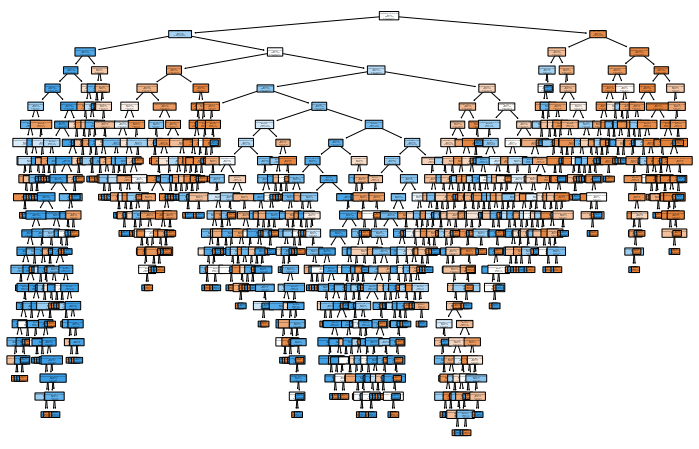

In [166]:
# Visualize the decision tree
model_tree = DecisionTreeClassifier().fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(model_tree, filled=True, rounded=True, feature_names=[ 'OrbitalPeriod_days', 'TransitEpoch_BKJD', 'ImpactParamete', 'TransitDuration_hrs',
    'TransitDepth_ppm', 'PlanetaryRadius_Earthradii', 'EquilibriumTemperatureK',
    'InsolationFlux_Earthflux', 'TransitSignal-to-Nois', 'StellarEffectiveTemperatureK',
    'StellarSurfaceGravity_log10(cm/s**2)', 'StellarRadius_Solarradii', 'RA_decimaldegrees',
    'Dec_decimaldegrees', 'Kepler-band_mag', 'OrbitalPeriodUnc', 'TransitEpochUnc',
    'ImpactParameterUnc', 'TransitDurationUnc_hrs', 'TransitDepthUnc_ppm',
    'PlanetaryRadiusUnc_Earthradii', 'InsolationFluxUnc_Earthflux',
    'StellarEffectiveTemperatureUncK', 'StellarSurfaceGravityUnc_log10(cm/s**2)',
    'StellarRadiusUnc_Solarradii'], class_names=['no', 'yes'])
plt.show()

In [167]:
#hyperparameter optimization
model_tree = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_dephts = [None, 4, 8, 12, 16, 20]
#min_samples_split = [1, 2, 3, 4, 5]
#min_samples_leaf = [1, 2, 3, 4, 5]
#max_features = ['auto', 'sqrt', 'log2', None]

trc = GridSearchCV(estimator=model_tree,
                   scoring=['accuracy'],
                   param_grid={
                       'criterion': criterion,
                       'max_depth': max_dephts
                       #'min_samples_split': min_samples_split,
                       #'min_samples_leaf': min_samples_leaf,
                       #'max_features': max_features
                   },
                   n_jobs=-1, 
                   cv=3,
                   refit='accuracy',
                   verbose=0)

grid_result = trc.fit(X_train, y_train)

# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {grid_result.best_score_:.4f}')
# Print the hyperparameters for the best score
print(f'The best hyperparameters are {grid_result.best_params_}')

The best accuracy score for the training dataset is 0.8135
The best hyperparameters are {'criterion': 'entropy', 'max_depth': 4}


In [168]:
# Create Decision tree with optimal parameters
model_tree_4 = DecisionTreeClassifier(criterion="entropy", max_depth=4)

#evaluate the model
cross_val_results = pd.DataFrame(cross_validate(model_tree_4, X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))

cross_val_results

,fit_time,score_time,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro
0,0.331,0.008,0.807,0.807,0.808,0.807
1,0.302,0.027,0.826,0.826,0.826,0.826
2,0.361,0.007,0.815,0.815,0.815,0.815
3,0.267,0.008,0.792,0.792,0.792,0.792
4,0.268,0.040,0.809,0.809,0.809,0.809


In [169]:
result_df = append_results('Decision Tree','With max_depth 4', cross_val_results, result_df)

# Generalization

In [81]:
# Create Decision Tree with max_depth hyperparametr 
model_tree_4 = DecisionTreeClassifier(criterion="entropy", max_depth=4)
y_pred = model_tree_4.fit(X_train, y_train).predict(X_test)

confusion(y_test, pd.Series(y_pred))

predicted,0,1
target,,
0,1199,283
1,270,1255


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1482
           1       0.82      0.82      0.82      1525

    accuracy                           0.82      3007
   macro avg       0.82      0.82      0.82      3007
weighted avg       0.82      0.82      0.82      3007



# Random Forest

In [170]:
# Instantiate the random forest classifier (without hyperparameter tuning )
ran_forest = RandomForestClassifier()

cross_val_results = pd.DataFrame(cross_validate(ran_forest, X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))

cross_val_results

,fit_time,score_time,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro
0,5.379,0.060,0.856,0.856,0.856,0.856
1,5.279,0.098,0.860,0.860,0.861,0.860
2,5.044,0.078,0.848,0.848,0.849,0.849
3,4.326,0.076,0.856,0.856,0.856,0.856
4,4.206,0.066,0.853,0.853,0.854,0.853


In [45]:
#with hyperparameter tuning
ran_forest = RandomForestClassifier()

ntrees = [100,200,300,None]
max_depth = [50, 100,200,None]
criterion = ['gini', 'entropy']
#balance = [None, 'balanced', 'balanced_subsample']

trc = GridSearchCV(estimator=ran_forest,
                   scoring=['accuracy'],
                   param_grid={
                       'n_estimators': ntrees,
                       'max_depth':max_depth,
                       'criterion':criterion
                   },
                   n_jobs=-1, 
                   cv=3,
                   refit='accuracy',
                   verbose=0)

grid_result = trc.fit(X_train, y_train)

# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {grid_result.best_score_:.4f}')
# Print the hyperparameters for the best score
print(f'The best hyperparameters are {grid_result.best_params_}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 133, in _validate_estimator
    type(self.n_estimators)
ValueError: n_estimators must be an integ

The best accuracy score for the training dataset is 0.8538
The best hyperparameters are {'criterion': 'entropy', 'max_depth': 200, 'n_estimators': 300}


In [171]:
# Instantiate the random forest classifier (without hyperparameter tuning )
ran_forest = RandomForestClassifier(criterion = 'entropy' , max_depth = 200, n_estimators = 300)

cross_val_results = pd.DataFrame(cross_validate(ran_forest, X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))

cross_val_results

,fit_time,score_time,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro
0,20.222,0.258,0.857,0.857,0.858,0.857
1,21.215,0.226,0.856,0.856,0.857,0.856
2,20.486,0.203,0.852,0.852,0.852,0.852
3,19.698,0.253,0.860,0.860,0.860,0.860
4,22.070,0.298,0.849,0.849,0.849,0.849


In [172]:
result_df = append_results('Random Forrest','With Hyperparameter optimization', cross_val_results, result_df)

# Generalization

In [83]:
ran_forest = RandomForestClassifier(criterion = 'entropy' , max_depth = 200, n_estimators = 300)
y_pred = ran_forest.fit(X_train, y_train).predict(X_test)

confusion(y_test, pd.Series(y_pred))

predicted,0,1
target,,
0,1265,217
1,226,1299


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1482
           1       0.86      0.85      0.85      1525

    accuracy                           0.85      3007
   macro avg       0.85      0.85      0.85      3007
weighted avg       0.85      0.85      0.85      3007



# SVM support verctor machine 
standard svm without any hyperparameter optimization

In [91]:
# List of C values
C_range = np.logspace(-5, 5, 11)
# Define the search space
param_grid = { 
    # Regularization parameter.
    "C": C_range,
    # Kernel type
    "kernel": ['rbf', 'linear']      ##,'poly'],
    }
scoring = ['accuracy']

In [93]:
svm = SVC()
grid_search = GridSearchCV(estimator=svm, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=3, 
                           verbose=0)

In [ ]:
#perform random search to ptimize the hyperparameters
grid_result = grid_search.fit(X_train, y_train)

# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {grid_result.best_score_:.4f}')
# Print the hyperparameters for the best score
print(f'The best hyperparameters are {grid_result.best_params_}')

In [173]:
#svm cross validation results for best hyperparameters
svm = SVC(C=10.0,kernel='rbf')
cross_val_results = pd.DataFrame(cross_validate(svm, X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))

cross_val_results

,fit_time,score_time,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro
0,3.286,1.133,0.841,0.841,0.844,0.841
1,2.650,1.544,0.848,0.848,0.848,0.848
2,4.172,1.324,0.856,0.856,0.856,0.856
3,2.780,1.458,0.837,0.837,0.838,0.837
4,3.500,1.211,0.837,0.837,0.838,0.837


In [174]:
result_df = append_results('SVM','With feature  selection ', cross_val_results, result_df)

# Feature Selection
Feature Selection has random search takes a while even if search space is not that big

In [ ]:
#perform feature slection for svm we will use the found hyperparameters from above 

svm = SVC(C=10.0,kernel='rbf')

# Sequential Backward Selection
sbs = SFS(svm, 
          forward=False, 
          floating=False,
          k_features=1,
          scoring='accuracy',
          cv = 5)

sbs = sbs.fit(X_train, y_train)

In [ ]:
#display the results
df_svm_result = pd.DataFrame(sbs.get_metric_dict())
display(df_svm_result)

In [ ]:
#plot the average score
avg_score = df_svm_result.loc['avg_score']
avg_score.plot(kind='line', marker='o')

In [ ]:
#print all the avergae accuracy
for column in df_svm_result.columns:
    avg_score = df_svm_result.loc['avg_score', column]
    # Access each column using the column label
    print(f"Number of Feutures '{column}': -> Accuracy {avg_score}" )

In [ ]:
#Select the indexes of the 10 most important features and create a test and train data set only with them
feature_indexes = list(df_svm_result[15]['feature_idx'])
df_X_train = select_features(X_train,column_labels,feature_indexes)
df_X_test = select_features(X_test,column_labels,feature_indexes)

#print the feature names of the 15 most imprtant features
print(df_X_train.columns)

In [ ]:
#transform back to numpy array for svm
X_test_feature =  df_X_test.to_numpy()
X_train_feature = df_X_train.to_numpy()
svc = SVC()

grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=3, 
                           verbose=0)

#perform random search to ptimize the hyperparameters
#random_result = random_search.fit(X_train, y_train)
grid_result = grid_search.fit(X_train_feature, y_train)

# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {grid_result.best_score_:.4f}')
# Print the hyperparameters for the best score
print(f'The best hyperparameters are {grid_result.best_params_}')

we get the same hyperparameters and similar accuracy but a simplar model as we are using less features

In [ ]:
svm = SVC(C=10.0,kernel='rbf')
cross_val_results = pd.DataFrame(cross_validate(svm, X_train_feature, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))

cross_val_results

# Final result 

In [175]:
result_df.sort_values(by='F1 Macro',ascending=False)

,Model,Details,Accuracy,F1 Macro,Precision Macro,Recall Macro
2,Random Forrest,With Hyperparameter optimization,0.855,0.855,0.855,0.855
3,SVM,With feature selection,0.844,0.844,0.845,0.844
0,Logistic Regression,Performed feature selection,0.832,0.832,0.833,0.832
1,Decision Tree,With max_depth 4,0.810,0.810,0.810,0.810


Random Forrest wins !!!

In [176]:
# Generalization of best model (random forrest)
ran_forest = RandomForestClassifier(criterion = 'entropy' , max_depth = 200, n_estimators = 300)
y_pred = ran_forest.fit(X_train, y_train).predict(X_test)

confusion(y_test, pd.Series(y_pred))

predicted,0,1
target,,
0,1244,238
1,210,1315


In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1482
           1       0.85      0.86      0.85      1525

    accuracy                           0.85      3007
   macro avg       0.85      0.85      0.85      3007
weighted avg       0.85      0.85      0.85      3007

